# Neural Network Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
import tensorflow.keras.layers
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


from keras.callbacks import History

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


2022-11-01 19:36:55.902040: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Lodding the dataset
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.shape

(918, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# checking the missing values
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## EDA

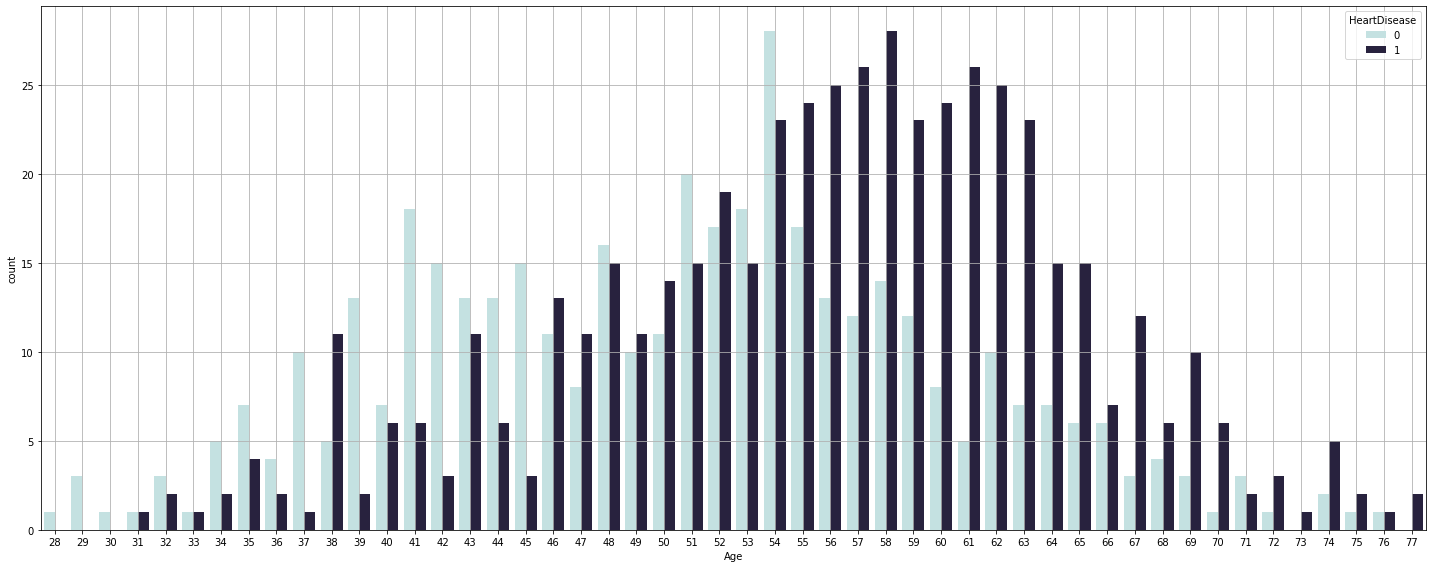

In [8]:
#Age of people with heart disease
plt.subplots(figsize=(20, 8))
sns.countplot(data['Age'],hue=data['HeartDisease'],palette='ch:start=.2,rot=-.3',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

Most people who have heart disease between 55 : 65 years

In [9]:
d2=pd.DataFrame(data.groupby(['Sex','HeartDisease'])['Sex'].count())
d2
prop_of_gender=[]
for val in np.sort(data['Sex'].unique()):
    prop=d2['Sex'][val][1]/(d2['Sex'][val][1]+d2['Sex'][val][0])
    prop_of_gender.append({
        'Sex':val,
        'proportion':prop
    })
prop_of_gender=pd.DataFrame(prop_of_gender)
prop_of_gender.sort_values('proportion',ascending=False,inplace=True)
prop_of_gender

,Sex,proportion
1,M,0.631724
0,F,0.259067


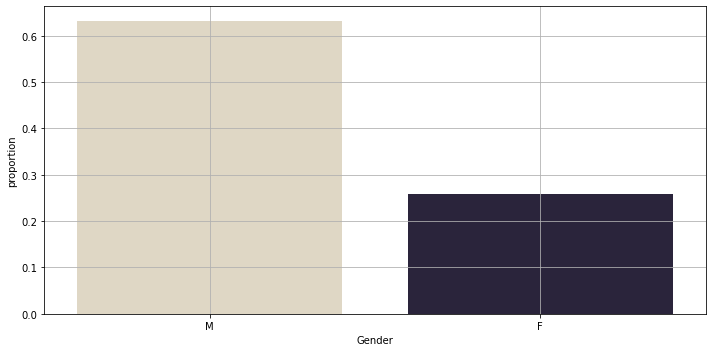

In [10]:
#Gender of people with heart disease
plt.figure(figsize=(10,5))
sns.barplot(x=prop_of_gender['Sex'],y=prop_of_gender['proportion'],palette='ch:s=-.2,r=.6',order=prop_of_gender['Sex'])
plt.xlabel('Gender')
plt.tight_layout()
plt.grid(True)
plt.show()

Male who most have heart disease

<AxesSubplot:>

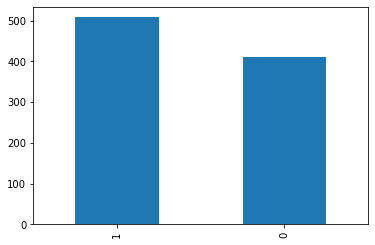

In [11]:
#Check Data Balance
data['HeartDisease'].value_counts().plot(kind='bar')

our data is almost balanced

In [12]:
#Define input and target
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [13]:
# One Hot Encoding the multi columns
Column_Transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,6,8,10])], remainder='passthrough')

In [14]:
X=Column_Transformer.fit_transform(X)
X=pd.DataFrame(X)

In [15]:
#copy of input and target
X2=X
y2=y

In [16]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 4)

In [17]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the ANN

In [18]:
#Initializing the ANN
ann = tf.keras.models.Sequential()

Adding the input layer and hidden layers

In [19]:
# The 1st hidden layer will have 6 units and the activation function is relu
ann.add(tf.keras.layers.Dense(units=6, activation='LeakyReLU'))

In [20]:
# The 2nd hidden layer will have 6 units and the activation function is relu

ann.add(tf.keras.layers.Dense(units=6, activation='LeakyReLU'))

Adding the output layer

In [21]:
# The output layer has only one unit since it is binary classification --> Only 2 states
# The activation function is the sigmoid
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Training the ANN

In [22]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
# Note: use y_train.values and not y_train since this will raise an error

history= ann.fit(X_train, y_train.values, batch_size = 32, epochs = 300)

Epoch 1/300
23/23 [==============================] - 1s 2ms/step - loss: 0.7562 - accuracy: 0.4578
Epoch 2/300
23/23 [==============================] - 0s 4ms/step - loss: 0.6992 - accuracy: 0.5368
Epoch 3/300
23/23 [==============================] - 0s 3ms/step - loss: 0.6463 - accuracy: 0.6567
Epoch 4/300
23/23 [==============================] - 0s 5ms/step - loss: 0.5924 - accuracy: 0.7793
Epoch 5/300
23/23 [==============================] - 0s 2ms/step - loss: 0.5356 - accuracy: 0.8283
Epoch 6/300
23/23 [==============================] - 0s 4ms/step - loss: 0.4813 - accuracy: 0.8420
Epoch 7/300
23/23 [==============================] - 0s 5ms/step - loss: 0.4361 - accuracy: 0.8569
Epoch 8/300
23/23 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8638
Epoch 9/300
23/23 [==============================] - 0s 4ms/step - loss: 0.3787 - accuracy: 0.8651
Epoch 10/300
23/23 [==============================] - 0s 2ms/step - loss: 0.3637 - accuracy: 0.8610
Epoch 11/

23/23 [==============================] - 0s 3ms/step - loss: 0.2949 - accuracy: 0.8842
Epoch 84/300
23/23 [==============================] - 0s 2ms/step - loss: 0.2944 - accuracy: 0.8856
Epoch 85/300
23/23 [==============================] - 0s 2ms/step - loss: 0.2941 - accuracy: 0.8856
Epoch 86/300
23/23 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.8869
Epoch 87/300
23/23 [==============================] - 0s 2ms/step - loss: 0.2938 - accuracy: 0.8856
Epoch 88/300
23/23 [==============================] - 0s 2ms/step - loss: 0.2931 - accuracy: 0.8856
Epoch 89/300
23/23 [==============================] - 0s 2ms/step - loss: 0.2927 - accuracy: 0.8856
Epoch 90/300
23/23 [==============================] - 0s 2ms/step - loss: 0.2926 - accuracy: 0.8856
Epoch 91/300
23/23 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 0.8856
Epoch 92/300
23/23 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 0.8869
Epoch 93/300


23/23 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.8937
Epoch 246/300
23/23 [==============================] - 0s 8ms/step - loss: 0.2607 - accuracy: 0.8951
Epoch 247/300
23/23 [==============================] - 0s 8ms/step - loss: 0.2607 - accuracy: 0.8937
Epoch 248/300
23/23 [==============================] - 0s 4ms/step - loss: 0.2601 - accuracy: 0.8924
Epoch 249/300
23/23 [==============================] - 0s 11ms/step - loss: 0.2606 - accuracy: 0.8924
Epoch 250/300
23/23 [==============================] - 0s 5ms/step - loss: 0.2600 - accuracy: 0.8965
Epoch 251/300
23/23 [==============================] - 0s 3ms/step - loss: 0.2605 - accuracy: 0.8924
Epoch 252/300
23/23 [==============================] - 0s 3ms/step - loss: 0.2605 - accuracy: 0.8924
Epoch 253/300
23/23 [==============================] - 0s 7ms/step - loss: 0.2598 - accuracy: 0.8924
Epoch 254/300
23/23 [==============================] - 0s 5ms/step - loss: 0.2598 - accuracy: 0.8937
Epo

In [24]:
model_loss = pd.DataFrame(ann.history.history)

<AxesSubplot:>

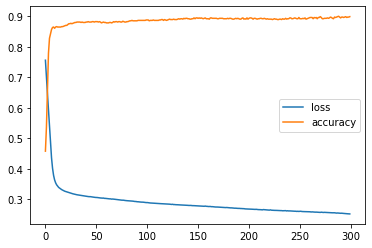

In [25]:
model_loss.plot()

# Making the predictions and evaluating the model

In [26]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

6/6 [==============================] - 0s 2ms/step


In [27]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.78      0.86        88
           1       0.83      0.96      0.89        96

    accuracy                           0.88       184
   macro avg       0.89      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



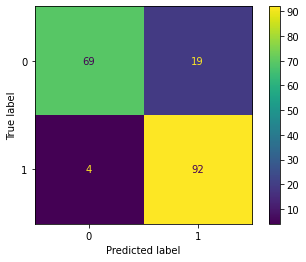

In [28]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp = disp.plot()

plt.show()

In [29]:
test_preds = ann.predict(X_test)
test_preds = [round(float(i), 0) for i in test_preds]
test_acc = accuracy_score(y_test, test_preds)
test_rec = recall_score(y_test, test_preds)
test_pre = precision_score(y_test, test_preds)
print('Test Set Metrics')
print('Ensemble Model Accuracy:', test_acc)
print('Ensemble Model Recall:', test_rec)
print('Ensemble Model Precision:', test_pre)

6/6 [==============================] - 0s 2ms/step
Test Set Metrics
Ensemble Model Accuracy: 0.875
Ensemble Model Recall: 0.9583333333333334
Ensemble Model Precision: 0.8288288288288288


# Classification Models

In [30]:
#Splitting the dataset into the Training set and Test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [31]:
# Instantiate Standard Scaler for 
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train1)
X_test_sc = scaler.transform(X_test1)

# Support Vector For Classification

In [32]:
class_sv = SVC(kernel = 'linear', random_state = 0)
class_sv.fit(X_train_sc, y_train1)
preds_class = class_sv.predict(X_test_sc)

In [33]:
val_train = round(class_sv.score(X_train_sc, y_train1),2)*100
val_test = round(class_sv.score(X_test_sc, y_test1),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 87.0%
Test Set Accuracy: 89.0%


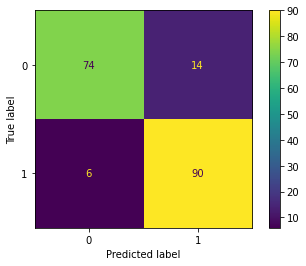

In [34]:
# We can also make a simple confusion matrix
plot_confusion_matrix(class_sv, X_test_sc, y_test1);

# Random Forest For Classification

In [35]:
class_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [36]:
class_forest.fit(X_train_sc, y_train1)

preds_class = class_forest.predict(X_test_sc)

In [37]:
val_train = round(class_forest.score(X_train_sc, y_train1),2)*100
val_test = round(class_forest.score(X_test_sc, y_test1),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 99.0%
Test Set Accuracy: 88.0%


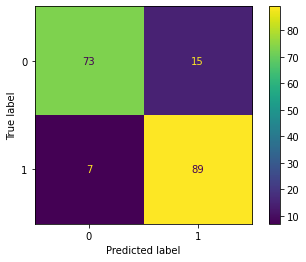

In [38]:
# We can also make a simple confusion matrix
plot_confusion_matrix(class_forest, X_test_sc, y_test1);

# Logistic Regression For Classification

In [39]:
pipe = make_pipeline(
    # Step-1 Scale parameters
    StandardScaler(),
    # Step-2 create PCA and set number of components
    PCA(n_components= 12),
    # Step-3 fit the principles to the ML model
    LogisticRegression()
)

pipe.fit(X_train1, y_train1)
pipe.score(X_test1, y_test1)

0.8913043478260869

In [40]:
pred = pipe.predict(X_test1)
print(classification_report(y_test1, pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        88
           1       0.86      0.95      0.90        96

    accuracy                           0.89       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.90      0.89      0.89       184



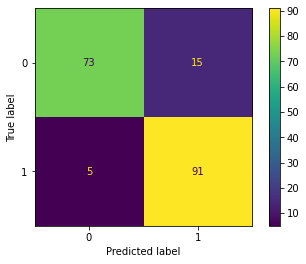

In [41]:
plot_confusion_matrix(pipe, X_test1, y_test1)
plt.grid(False);

# Grid Search || Support Vector For Classification

In [42]:
# Tune hyperparameter Classification
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(class_sv, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_sc, y_train1)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.565 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.565 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.558 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.558 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.816 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.823 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.836 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.864 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.789 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.735 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.726 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.803 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.796 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.774 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.830 total time=   0.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.830 total time=   0.1s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.830 total time=   0.1s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(kernel='linear', random_state=0),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [43]:
grid_df = pd.DataFrame(grid.cv_results_)

grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030578,0.011186,0.013740,0.002852,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.564626,0.564626,0.557823,0.557823,0.561644,0.561308,0.003047,22
1,0.017349,0.001139,0.010232,0.002574,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.816327,0.857143,0.857143,0.823129,0.835616,0.837872,0.016908,13
2,0.015394,0.002041,0.007856,0.000465,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.863946,0.863946,0.884354,0.836735,0.835616,0.856919,0.018507,12
3,0.020648,0.002037,0.010967,0.001047,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.564626,0.564626,0.557823,0.557823,0.561644,0.561308,0.003047,22
4,0.022596,0.004953,0.011482,0.002040,0.1,0.0001,rbf,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.564626,0.564626,0.557823,0.557823,0.561644,0.561308,0.003047,22
5,0.025592,0.002127,0.011166,0.000298,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.755102,0.761905,0.714286,0.734694,0.739726,0.741142,0.016678,21
6,0.016012,0.001567,0.007403,0.000928,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.857143,0.863946,0.884354,0.850340,0.876712,0.866499,0.012476,1
7,0.010380,0.000262,0.004901,0.000107,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.843537,0.884354,0.884354,0.836735,0.863014,0.862399,0.019894,4
8,0.015799,0.002507,0.007292,0.000229,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.863946,0.877551,0.891156,0.836735,0.835616,0.861001,0.022023,6
9,0.024362,0.001253,0.013623,0.002250,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.564626,0.564626,0.557823,0.557823,0.561644,0.561308,0.003047,22


In [44]:
# print best parameter after tuning
print(f'Best Params: {grid.best_params_}')
  
# print how our model looks after hyper-parameter tuning
print(f'Best Estimator:{grid.best_estimator_}')
print(f'Best Score: {grid.best_score_}')
print(f'Score: {grid.score(X_test_sc, y_test1)}')

Best Params: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best Estimator:SVC(C=1, gamma=0.1, random_state=0)
Best Score: 0.8664989283384585
Score: 0.8532608695652174


# After Tune || SVM

In [45]:
class_sv = SVC(kernel = 'rbf', random_state = 0, C= 1, gamma=0.1)

class_sv.fit(X_train_sc, y_train1)
preds_class = class_sv.predict(X_test_sc)

In [46]:
val_train = round(class_sv.score(X_train_sc, y_train1),2)*100
val_test = round(class_sv.score(X_test_sc, y_test1),2)*100

SVM_Train_Acc = val_train
SVM_Test_Acc = val_test 

print(f'Training Accuracy: {SVM_Train_Acc}%')
print(f'Test Set Accuracy: {SVM_Test_Acc}%')

Training Accuracy: 93.0%
Test Set Accuracy: 85.0%


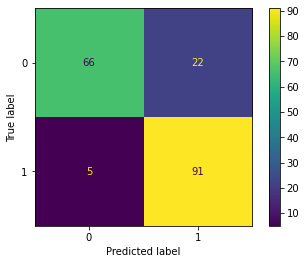

In [47]:
# We can also make a simple confusion matrix
plot_confusion_matrix(class_sv, X_test_sc, y_test1);

# Grid Search || Random Forest For Classification

In [48]:
# Tune hyperparameter Classification
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]}

grid = GridSearchCV(class_forest, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train_sc, y_train1)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.857 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.878 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.884 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.857 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.877 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.857 total time=   0.3s
[CV 2/5] END bootstrap=True, max_dep

[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200;, score=0.877 total time=   0.5s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300;, score=0.857 total time=   0.6s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300;, score=0.884 total time=   0.6s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300;, score=0.871 total time=   0.6s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300;, score=0.857 total time=   0.6s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300;, score=0.877 total time=   0.6s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10,

[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.857 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.878 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.871 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.857 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200;, score=0.877 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.850 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_spl

[CV 2/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.884 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.871 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.864 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.877 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.857 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.884 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_spl

[CV 2/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300;, score=0.884 total time=   0.5s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300;, score=0.871 total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300;, score=0.857 total time=   0.5s
[CV 5/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300;, score=0.870 total time=   0.5s
[CV 1/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.850 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.884 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split

[CV 2/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.884 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.878 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.850 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200;, score=0.877 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.857 total time=   0.5s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.884 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, 

[CV 2/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.884 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.878 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.844 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.877 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.850 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_spl

[CV 2/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.884 total time=   0.7s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.871 total time=   0.7s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.857 total time=   0.5s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300;, score=0.877 total time=   0.5s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.850 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.871 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_spl

[CV 2/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.884 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.864 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.857 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200;, score=0.870 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300;, score=0.857 total time=   0.5s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300;, score=0.884 total time=   0.5s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_spl

[CV 2/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.884 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.878 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.844 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.870 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.850 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.884 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, 

[CV 2/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.884 total time=   0.6s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.878 total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.857 total time=   0.5s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300;, score=0.877 total time=   0.5s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.850 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.871 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_

[CV 2/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.884 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.871 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.857 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.877 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.857 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.884 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samp

[CV 2/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.871 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.871 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.850 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=100;, score=0.877 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.850 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.884 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samp

[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300;, score=0.857 total time=   0.5s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300;, score=0.884 total time=   0.5s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300;, score=0.864 total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300;, score=0.857 total time=   0.5s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300;, score=0.870 total time=   0.5s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.850 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_sampl

[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.850 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.884 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.878 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.857 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.877 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300;, score=0.850 total time=   0.5s
[CV 2/5] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_sp

[CV 2/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.871 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.891 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.857 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100;, score=0.877 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.850 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200;, score=0.871 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samp

[CV 1/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.857 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.884 total time=   0.4s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.864 total time=   0.4s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.857 total time=   0.4s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300;, score=0.877 total time=   0.4s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100;, score=0.850 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samp

[CV 1/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.850 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.884 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.871 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.850 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200;, score=0.877 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300;, score=0.844 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samp

[CV 5/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300;, score=0.870 total time=   0.5s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.850 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.871 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.871 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.857 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100;, score=0.870 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_s

[CV 5/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200;, score=0.877 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300;, score=0.850 total time=   0.5s
[CV 2/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300;, score=0.884 total time=   0.5s
[CV 3/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300;, score=0.871 total time=   0.5s
[CV 4/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300;, score=0.857 total time=   0.5s
[CV 5/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300;, score=0.877 total time=   0.5s
[CV 1/5] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_sp

GridSearchCV(estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10, random_state=0),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [49]:
# print best parameter after tuning
print(f'Best Params: {grid.best_params_}')
  
# print how our model looks after hyper-parameter tuning

print(f'Best Estimator:{grid.best_estimator_}')
print(f'Best Score: {grid.best_score_}')
print(f'Score: {grid.score(X_test_sc, y_test1)}')

Best Params: {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}
Best Estimator:RandomForestClassifier(criterion='entropy', max_depth=80, max_features=3,
                       min_samples_leaf=3, min_samples_split=12,
                       random_state=0)
Best Score: 0.871941105209207
Score: 0.8967391304347826


# After Tune || Random Forest For Classification

In [50]:
class_forest = RandomForestClassifier(criterion='entropy', max_depth=80, max_features=3,
                       min_samples_leaf=3, min_samples_split=12,
                       random_state=0)

class_forest.fit(X_train_sc, y_train1)
preds_class = class_forest.predict(X_test_sc)

In [51]:
val_train = round(class_forest.score(X_train_sc, y_train1),2)*100
val_test = round(class_forest.score(X_test_sc, y_test1),2)*100

RF_Train_Acc = val_train
RF_Test_Acc = val_test 

print(f'Training Accuracy: {RF_Train_Acc}%')
print(f'Test Set Accuracy: {RF_Test_Acc}%')

Training Accuracy: 92.0%
Test Set Accuracy: 90.0%


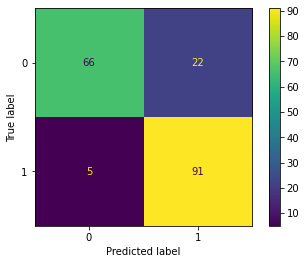

In [52]:
# We can also make a simple confusion matrix
plot_confusion_matrix(class_sv, X_test_sc, y_test1);

# Grid Search || Logistic Regression Model

In [53]:

param_grid = {
    "standardscaler__with_mean": [True, False], #
    "standardscaler__with_std": [True, False],
    "pca__n_components": [5,6,7,8,9,10, 11, 12, 13, 14], # 10 components explains the most variance
    "logisticregression__C": [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
    "logisticregression__max_iter": [ 1000, 2000, 2500]
}

grid = GridSearchCV(
    pipe, 
    param_grid=param_grid, 
    cv=5, 
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train1,y_train1)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, 

[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=True, standardscale

[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=True, standardscaler

[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=True, standardscale

[CV] END logisticregression__C=1, logisticregression__max_iter=2000, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=2000, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=2000, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=2000, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=1, logisticregression__max_iter=2000, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=1, logisticregression__max_iter=2000, pca__n_components=13, standardscaler__with_mean=False, standards

[CV] END logisticregression__C=1, logisticregression__max_iter=2000, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=2000, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=2000, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=1, logisticregression__max_iter=2000, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=1, logisticregression__max_iter=2000, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=1, logisticregression__max_iter=2000, pca__n_components=14, standardscaler__with_mean=True, standard

[CV] END logisticregression__C=1, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=2500, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=1, logisticregression__max_iter=2500, pca__n_components=6, standardscaler__with_mean=False, standard

[CV] END logisticregression__C=0.9, logisticregression__max_iter=1000, pca__n_components=9, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=1000, pca__n_components=9, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=1000, pca__n_components=9, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=1000, pca__n_components=11, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=1000, pca__n_components=11, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=1000, pca__n_components=11, standardscaler__with_mean=F

[CV] END logisticregression__C=0.9, logisticregression__max_iter=1000, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=1000, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=1000, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=1000, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=1000, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mean=True, s

[CV] END logisticregression__C=0.9, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=True, stand

[CV] END logisticregression__C=0.9, logisticregression__max_iter=2000, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2000, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2000, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2000, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2000, pca__n_components=8, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2000, pca__n_components=8, standardscaler__with_mean=False, 

[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=True, s

[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=8, standardscaler__with_mean=Fa

[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.9, logisticregression__max_iter=2500, pca__n_components=13, standardscaler__with_mean=T

[CV] END logisticregression__C=0.8, logisticregression__max_iter=1000, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=1000, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=1000, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=1000, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=1000, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=1000, pca__n_components=7, standardscaler__with_mean=False, sta

[CV] END logisticregression__C=0.8, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=2000, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=2000, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=2000, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=2000, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=2000, pca__n_components=8, standardscaler__with_mean=True, s

[CV] END logisticregression__C=0.8, logisticregression__max_iter=2000, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=2000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=2000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=True, sta

[CV] END logisticregression__C=0.8, logisticregression__max_iter=2500, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=2500, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=2500, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.8, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=Fa

[CV] END logisticregression__C=0.7, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=1000, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=1000, pca__n_components=7, standardscaler__with_mean=True, s

[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=9, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=9, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=9, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=11, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=11, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=11, standardscaler__with_mean=Tr

[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=11, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=11, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=11, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=11, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=13, standardscaler__with_mea

[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=12, standardscaler__with_mea

[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=11, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=11, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=11, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=11, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.7, logisticregression__max_iter=2000, pca__n_components=12, standardscaler__with_mean=T

[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=11, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=11, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=11, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=11, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=11, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=11, standardscaler__with_mean=False

[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=False

[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=11, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=12, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=12, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=13, standardscaler__with_mean=T

[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=11, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=11, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=11, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=12, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=12, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=1000, pca__n_components=12, standardscaler__with_mean=Tru

[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=False, stan

[CV] END logisticregression__C=0.6, logisticregression__max_iter=2000, pca__n_components=14, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2000, pca__n_components=14, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2000, pca__n_components=14, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2000, pca__n_components=14, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2000, pca__n_components=14, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2000, pca__n_components=14, standardscaler__with_mea

[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=12, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.6, logisticregression__max_iter=2500, pca__n_components=12, standardscaler__with_mean

[CV] END logisticregression__C=0.5, logisticregression__max_iter=1000, pca__n_components=12, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=1000, pca__n_components=12, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=1000, pca__n_components=12, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=1000, pca__n_components=12, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=1000, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=1000, pca__n_components=12, standardscaler__with_mean=False

[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=True, s

[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=14, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=14, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=14, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=True, 

[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=12, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=12, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=12, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2000, pca__n_components=13, standardscaler__with_mean=F

[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=9, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=9, standardscaler__with_mean=False, stan

[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=False, sta

[CV] END logisticregression__C=0.5, logisticregression__max_iter=2500, pca__n_components=14, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=7, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=7, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=1000, pca__n_components=8, standardscaler__with_mean=True,

[CV] END logisticregression__C=0.4, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=False, stan

[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=7, standardscaler__with_mean=True,

[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=11, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=11, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=11, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=11, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=11, standardscaler__with_mean=Fals

[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=9, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=9, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=10, standardscaler__with_mean=Tru

[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=14, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=14, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=14, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.4, logisticregression__max_iter=2500, pca__n_components=14, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mea

[CV] END logisticregression__C=0.3, logisticregression__max_iter=1000, pca__n_components=12, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=1000, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=1000, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=1000, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=1000, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=1000, pca__n_components=13, standardscaler__with_mean=Tru

[CV] END logisticregression__C=0.3, logisticregression__max_iter=2000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2000, pca__n_components=6, standardscaler__with_mean=Fals

[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=5, standardscaler__with_mean=False, stan

[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=11, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=11, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=11, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=11, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=11, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=11, standardscaler__with_mean

[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=13, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=14, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=14, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=14, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=14, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=14, standardscaler__with_mean=True

[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=12, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=12, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.3, logisticregression__max_iter=2500, pca__n_components=13, standardscaler__with_mean=Tr

[CV] END logisticregression__C=0.2, logisticregression__max_iter=1000, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=1000, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=1000, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=1000, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=1000, pca__n_components=14, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=1000, pca__n_components=14, standardscaler__with_mean=Tr

[CV] END logisticregression__C=0.2, logisticregression__max_iter=2000, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2000, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2000, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2000, pca__n_components=11, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2000, pca__n_components=11, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2000, pca__n_components=11, standardscaler__with_mean=Tr

[CV] END logisticregression__C=0.2, logisticregression__max_iter=2000, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2000, pca__n_components=13, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2000, pca__n_components=13, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2000, pca__n_components=14, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2000, pca__n_components=14, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2000, pca__n_components=14, standardscaler__with_mean=Tr

[CV] END logisticregression__C=0.2, logisticregression__max_iter=2000, pca__n_components=9, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2000, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2000, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2000, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2000, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2000, pca__n_components=10, standardscaler__with_mean=Fa

[CV] END logisticregression__C=0.2, logisticregression__max_iter=2500, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2500, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2500, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2500, pca__n_components=13, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2500, pca__n_components=14, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.1s
[CV] END logisticregression__C=0.2, logisticregression__max_iter=2500, pca__n_components=14, standardscaler__with_mean=Tr

[CV] END logisticregression__C=0.1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.1, logisticregression__max_iter=1000, pca__n_components=5, standardscaler__with_mean=False, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.1, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.1, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=True, standardscaler__with_std=False; total time=   0.0s
[CV] END logisticregression__C=0.1, logisticregression__max_iter=1000, pca__n_components=6, standardscaler__with_mean=True, s

[CV] END logisticregression__C=0.1, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.1, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.1, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mean=True, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.1, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.1, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mean=False, standardscaler__with_std=True; total time=   0.0s
[CV] END logisticregression__C=0.1, logisticregression__max_iter=1000, pca__n_components=10, standardscaler__with_mean=Fals

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=12)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [1, 0.9, 0.8, 0.7, 0.6, 0.5,
                                                   0.4, 0.3, 0.2, 0.1],
                         'logisticregression__max_iter': [1000, 2000, 2500],
                         'pca__n_components': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                               14],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             verbose=2)

In [54]:
# print best parameter after tuning
print(f'Best Params: {grid.best_params_}')
  
# print how our model looks after hyper-parameter tuning

print(f'Best Estimator:{grid.best_estimator_}')
print(f'Best Score: {grid.best_score_}')
print(f'Score: {grid.score(X_test_sc, y_test1)}')

Best Params: {'logisticregression__C': 1, 'logisticregression__max_iter': 1000, 'pca__n_components': 14, 'standardscaler__with_mean': True, 'standardscaler__with_std': True}
Best Estimator:Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=14)),
                ('logisticregression', LogisticRegression(C=1, max_iter=1000))])
Best Score: 0.8582983878482899
Score: 0.8641304347826086


# After Tune || Logistic Regression Classification

In [55]:
pipe1 = make_pipeline(
    # Step-1 Scale parameters
    StandardScaler(),
    # Step-2 create PCA and set number of components
    PCA(n_components= 14),
    # Step-3 fit the principles to the ML model
    LogisticRegression(C=1, max_iter=1000)
)

pipe1.fit(X_train1, y_train1)
pipe1.score(X_test1, y_test1)

0.8913043478260869

In [56]:
pred = pipe1.predict(X_test1)
print(classification_report(y_test1, pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        88
           1       0.86      0.95      0.90        96

    accuracy                           0.89       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.90      0.89      0.89       184



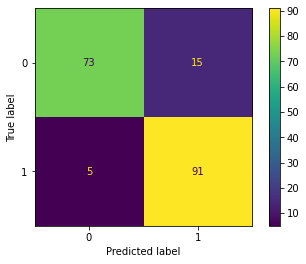

In [57]:
plot_confusion_matrix(pipe1, X_test1, y_test1)
plt.grid(False);

# Compare the results with our best ANN model

In [58]:
# Results of ANN model
test_acc = round(accuracy_score(y_test, test_preds),2)*100
print(f'Ensemble Model Accuracy: {test_acc}%')

Ensemble Model Accuracy: 88.0%


In [59]:
# Results of SVM Classification
print(f'Training Accuracy For SVM: {SVM_Train_Acc}%')
print(f'Test Set Accuracy For SVM: {SVM_Test_Acc}%')

Training Accuracy For SVM: 93.0%
Test Set Accuracy For SVM: 85.0%


In [60]:
# Results of Random Forst Classification
print(f'Training Accuracy: {RF_Train_Acc}%')
print(f'Test Set Accuracy: {RF_Test_Acc}%')

Training Accuracy: 92.0%
Test Set Accuracy: 90.0%


In [61]:
# Results of Logistic Classification
pipe1.fit(X_train1, y_train1)
Logistic_Train_Acc= round (pipe1.score(X_train1, y_train1),2)*100
Logistic_Test_Acc=round(pipe1.score(X_test1, y_test1),2)*100

print(f'Logistic Training Accuracy: {Logistic_Train_Acc}%')
print(f'Logistic Test Accuracy: {Logistic_Test_Acc}%')

Logistic Training Accuracy: 87.0%
Logistic Test Accuracy: 89.0%
